# Global Sales Analysis

## STEP 4A - Temporal Visualizations
By **Daniel Palacio** (github.com/palaciodaniel) - November 2021

Having built the definitive dataset, featuring cleaned and optimized information, now it is time to create the visualizations.

This does not mean that new changes on the dataset will not be necessary though, but those changes will not be meant to fix or modify data, but to adapt the information so that it can be displayed correctly.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset loading and configuration

In [2]:
# From now on we will use CSV format.
df = pd.read_csv("sales_final.csv", 
                   usecols = ["Date", "Sales"])

# Data will be ordered by date, in chronological order
df.sort_values("Date", axis = 0, ascending = True, inplace = True)

# Index reset
df.reset_index(drop = True, inplace = True)

# Sanity check: will first dates of 2012 be showed first?
df.head(2)

,Date,Sales
0,2012-01-12,130.96
1,2012-01-12,67.86


In [3]:
# Sanity check: will we get the last dates of 2014?

df.tail(2)

,Date,Sales
77566,2014-06-26,102.83
77567,2014-06-26,130.27


In [4]:
# It will be necessary for the "Date" column to be in "datetime" format. Which one is its current format?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77568 entries, 0 to 77567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    77568 non-null  object 
 1   Sales   77568 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [5]:
# Transforming the "Date" column to "datetime" format

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77568 entries, 0 to 77567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    77568 non-null  datetime64[ns]
 1   Sales   77568 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [6]:
# Sanity check: constatar que los tres años son considerados como tales

(df["Date"].dt.year).unique()

array([2012, 2013, 2014])

In [7]:
# Sanity check: confirming that the 12 months of the year will be considered

(df["Date"].dt.month).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
# Setting "Date" column as index

df.set_index("Date", inplace = True)

The next step is critical, given that it will alter all the dataset information by filtering it by month and then applying the total sum of "Sales" for every month.

Notice that the index will reflect the last days of every month. This can be pretty informative, in the sense of showcasing which months will have an additional day of sales (due to having 31 days instead of 30, of course).

In [9]:
df_monthly = df.resample("M")[["Sales"]].sum() # Using double square bracket to create a DataFrame.

df_monthly.head()

,Sales
Date,
2012-01-31,1292010.72
2012-02-29,2852617.19
2012-03-31,2353680.93
2012-04-30,2676966.29
2012-05-31,2191371.34


In [10]:
# Number of months, each represented by their last days

df_monthly.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

These preparations will not be the last ones, but at this point they already allow to begin with the first visualization.

- - -

## Temporal Visualizations

#### Justification of chosen metrics

For this first section of visualizations, the grouping criterion is the temporal dimension, that is, the changes in earned profits across the years investigated.

These types of metrics are fundamental, simply because without them it is impossible to know what is the business status, the "health" of its finances, and the risks, feasible investments and even opportunities that could be used to grow the company.

Besides, the discovered patterns also could represent future projections, or reveal seasonal tendencies that these graphics will shed light upon. Furthermore, they can allow further analyses of socioeconomic type.

Finally, although the generated graphics display a global level of profits, of course the same criteria can be further refined to focus on weeks, specific days or even adding aditional filters like cities, clients or products.

- - -

### First Visualization - Line Plot (Time Series)

The following graphic is useful not only to see the earnings of every month, but also to check over time if there was an increase or decrease of profits with respect to the previous month.

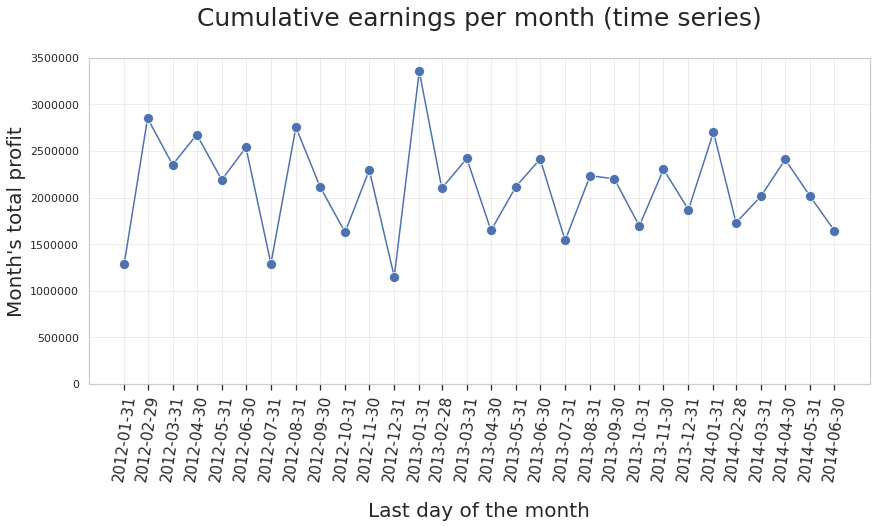

In [11]:
# Creation and configuration of Line Plot (Time Series)

sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("whitegrid")

sns.lineplot(x = df_monthly.index, 
             y = df_monthly["Sales"],
             alpha = 1,
             marker = "o",
             markersize = 10)

plt.tick_params(
                axis = "x", 
                reset = True,
                top = False)
plt.ticklabel_format(
                    style='plain', 
                    axis='y') # Removes scientific notation ("e") from values.
plt.xticks(
           df_monthly.index, 
           fontsize = 15, 
           rotation = 82)
plt.grid(alpha = 0.35) # Background grid's transparency.
plt.ylim((0, 3500000)) # Y axis starts from value 0.

plt.title("Cumulative earnings per month (time series)", fontsize = 25, y = 1.08)
plt.xlabel("Last day of the month", fontsize = 20, labelpad = 20)
plt.ylabel("Month's total profit", fontsize = 20)

plt.show()

#### Insights Gained

At a general level, the graphic allows to discern that monthly sales, over time and except in extreme cases, oscillate between \\$1.500.000 and \\$3.000.000, keeping an approximate mean of \\$2.250.000.

Besides, it is interesting to note that quarterly periods of growth or decline are never reached. So, for instance, if in a certain month there is an increase, most likely the following month will show that sales decreased.

In a period of two and a half years, there were only four instances with tendencies that lasted two months:

- There were sales decreases from:
 - **August 2012** to **October 2012**.
 - **April 2014** to **June 2014**.

- There were sales increases from:
 - **April 2013** to **June 2013**.
 - **February 2014** to **April 2014**.

In general, sales differences between one month and the following one oscillate around \\$500.000. There was only a single case where the sales remained virtually unchanged: between **August 2013** and **September 2013**.

Of course, there were also cases of sudden sales decreases between consecutive months:
 - **June 2012** (\~\\$2.500.000) to **July 2012** (\~\\$1.250.000)
 - **November 2012** (\~\\$2.250.000) to **December 2012** (\~\\$1.000.000). In this regard, it is of great interest to note that December 2012 was the month of worst performance in the period 2012-mid 2014, even more considering it is the month of New Year, where the increase of purchases is obviously common and expected.
 - **January 2013** (\~\\$3.500.000) to **February 2013** (\~\\$2.000.000), though it obviously must be kept in mind the extreme amount of earnings for January, that reached historic values.

Complementary to the above, the cases of sudden sale increases between consecutive months took place in:
 - **January 2012** (\~\\$1.250.000) to **February 2012** (\~\\$3.000.000)
 - **July 2012** (\~\\$1.250.000) to **August 2012** (\~\\$2.750.000)
 - **December 2012** (\~\\$1.000.000) to **January 2013** (\~\\$3.500.000), which without a doubt constitutes the most shocking and impressive discovery of all, because it went from the month with worst performance in the period 2012-mid 2014 to the month with the biggest profits, and it undoubtedly reflects an unique situation that must be investigated more comprehensively.

- - -

### Second Visualization - Bar Plot - Comparison Between Months

Another good comparison metrics is by grouping the cumulative earnings per month, across the years.

In this case time series will not allow us to appreciate said comparison, and for that reason this vertical bar plot will be used instead.

In [12]:
# Creation of new dataset, where every year will be displayed in different columns.

pv = pd.pivot_table(df_monthly, 
                    index= df_monthly.index.month, 
                    columns = df_monthly.index.year,
                    values='Sales', 
                    aggfunc='sum')

pv.columns.name = "Year" # Legend's name in the graphic will be "Year"

pv

Year,2012,2013,2014
Date,,,
1,1292010.72,3357487.54,2703090.29
2,2852617.19,2100234.06,1731407.65
3,2353680.93,2421091.81,2017009.95
4,2676966.29,1648300.27,2409925.66
5,2191371.34,2119869.03,2012774.53
6,2539682.91,2414578.42,1646709.90
7,1291495.40,1540863.21,NaN
8,2756425.68,2236143.23,NaN
9,2115971.37,2201412.62,NaN


<AxesSubplot:title={'center':'Profits - Comparison Between Months'}, xlabel='Month', ylabel='Earnings (in millions)'>

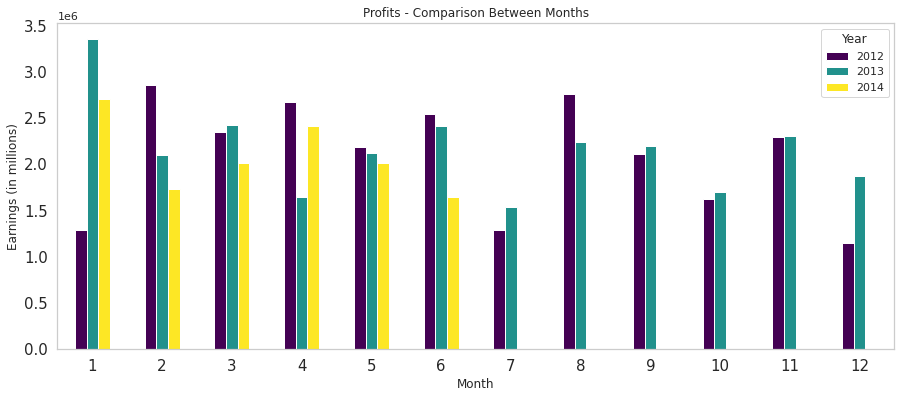

In [13]:
# Creation and configuration of Bar Plot - Comparison Between Months

pv.plot(kind = "bar", 
        title = "Profits - Comparison Between Months", 
        xlabel = "Month", 
        ylabel = "Earnings (in millions)",
        colormap = "viridis",
        figsize = (15, 6),
        fontsize = 15,
        grid = False,
        rot = 0)

#### Insights Gained

From the very start, the most evident point this graphic revealed is the lack of information starting on July 2014, but despite this big inconvenience certain observations could still be obtained.

For a matter of organization, all months will be examined consecutively.

Starting with **January**, a big leap can be seen between the sales of 2012 (one of the lowest points from the dataset) with respect to 2013 (which represented a historic milestone regarding volume of sales). It also was the month with the highest sales for 2014, although with an evident decrease when compared with the previous year. In other words, years 2013 and 2014 were very healthy in their respective beginnings.

**February** cannot be considered a good month, given that in every subsequent year sales decrease. There is a sharp drop in 2013 with respect to 2012, and even though 2014 did not experiment such an abrupt decrease, sales still kept decreasing anyway.

Along with January, **March** is the only month where sales increase in 2013 and then decrease in 2014. However, unlike January, 2013's sales keep certain similarity with the previous year, showing a more defined drop in 2014 instead.

**April** was one of the most peculiar months, given that after a 2012 with one of the highest sales levels there is a sharp drop for the next year, just like February. Besides, there is also an abrupt sales increase for 2014, which unfortunately will be the only one with respect to 2013. That is to say, with the exception of this month, 2014's sales unfortunately always decline compared to the previous year.

Among the months with indicators for all three years, **May** is the most uniform, although it always show a slight decrease in sales as years go by.

**June**, as stated before, is the last month for which 2014's sales volumes are available. Unfortunately it is similar to February in the sense of showing a sharp drop, only that this time is from 2013 to 2014.

In the case of **July**, it showed one of the worst sales numbers in both years (2012 and 2013), but at least there is a positive point: for 2013 sales were higher.

On the contrary, **August** was a healthier month, and even though it shows a sharp drop from 2012 to 2013, the latter had pretty decent sales numbers. For that reason, such decline is explained by the fact that 2012 was one of the peak months in terms of earnings, almost reaching the numbers of February (of the same year).

**September, October** and **November** are months characterized by the uniformity of sales volume between the two years, though showing a slight upward trend. However, it must be noted that for **October** sales levels were not far from reaching the deplorable levels of July, so it was not a particularly remarkable month.

Finally, **December** in 2012 had one of the worst sales numbers, but it showed a sharp and positive growth for the following year, which although it was far from being the best, nevertheless it achieved very acceptable margins.

- - -

### Third Visualization - Bar Plot - Horizontal Format

This type of graphic allows, from a visual point of view, to immediately compare the earnings of each month at a global level.

Due to the dates being displayed horizontally, and the bar colors changing according to the year, it is not only more intuitive in this sense, but also it will allow to highlight the months with extreme sales (whether they are low or high).

It can be considered a great complement to the first visualization (featuring time series).

In [14]:
# This graphic has been showing the month names incorrectly, therefore additional columns
# will be added to the original dataset, so that when creating the visualization
# tuples could be generated to replace this problematic format.

# Creation of "Month" column. The month abbreviation will be used instead of its number.
df_monthly["Month"] = df_monthly.index
df_monthly["Month"] = pd.to_datetime(df_monthly["Month"]).dt.strftime("%b")

# Creation of "Year" column.
df_monthly["Year"] = df_monthly.index.year

df_monthly.head(4)

,Sales,Month,Year
Date,,,
2012-01-31,1292010.72,Jan,2012
2012-02-29,2852617.19,Feb,2012
2012-03-31,2353680.93,Mar,2012
2012-04-30,2676966.29,Apr,2012


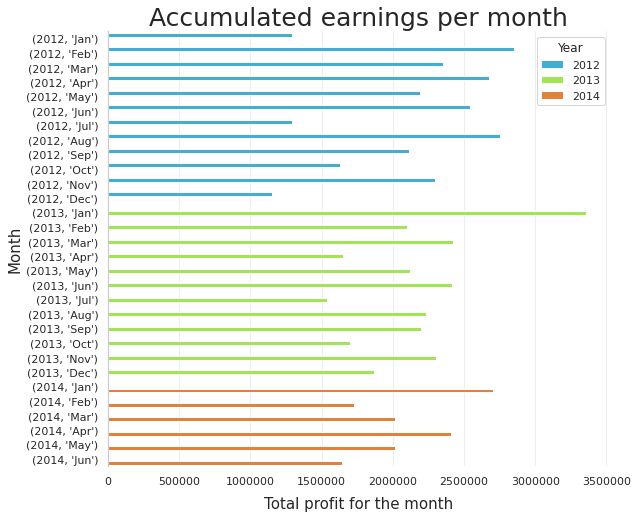

In [15]:
# Creation and configuration of Bar Plot - Horizontal Format

sns.set(rc={'figure.figsize':(9, 8)})

sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.barplot(x = df_monthly["Sales"], 
            y = df_monthly.index, 
            alpha = 1,
            hue = df_monthly["Year"],
            palette = "turbo")

labels = list(zip(df_monthly["Year"], df_monthly["Month"])) # List of new "yticks".
g.set_yticks(range(df_monthly.shape[0])) # Number of "yticks" to replace.
g.set_yticklabels(labels) # Using "labels" variable to replace "yticks" with incorrect format.

plt.ticklabel_format(style='plain', axis='x') # Removing scientific notation ("e") from values.
plt.grid(axis = "x", alpha = 0.35) # Background grid's transparency.

g.spines['top'].set_visible(False) # Removing borders.
g.spines['right'].set_visible(False)
g.spines['bottom'].set_visible(False)

plt.title("Accumulated earnings per month", fontsize = 25)
plt.xlabel("Total profit for the month", fontsize = 15, labelpad = 10)
plt.ylabel("Month", fontsize = 15)

plt.show()

#### Insights Gained

As a general reference point, the visualization shows that earnings are between \\$1.500.000 and \\$2.500.000. Both values will be referred to as lower and upper thresholds, respectively.

Considering this is all about the sales from a supermarket chain that operates in various parts of the world, we observe a fairly noticeable uniformity in the accumulation of monthly revenues.

Under this new perspective, even the most extreme months prove to be not that far away from the rest, and the sudden jumps in revenue margins still are not that abrupt (we are not taking about 10, 20 or more millions, as a comparison).

Taking this into account, it is still clear that 2012 was the year with the most unsuccessful months, with three cases (January, July and December) having sales levels below the lower threshold of $1.500.000. A positive fact is that the rest of the years, including the least favored months like July 2013, still cross this threshold.

However, it is also true that 2012 was the year with more months that surpassed the \\$2.500.000 threshold, specifically February, April, June and August.

Notwithstanding the above, it is clear that the highest value of 2012, which was reached on February, is still  very far from the spectacular sales margin of January 2013, which almost exceeded one million with respect to the upper threshold, but as a counterpart, no other month of 2013 crosses that upper threshold again.

Again, 2014 has a triumphant first month, with the highest sales of the year (but always remembering that June is the last month with information, of course). But this particular January, while it surpassed the upper threshold, is far away from the numbers of the previous year.

Finally, and just as what was observed with the time series visualization, here it is also very clear that there are no periods of sustained growth or decline, and the trend in one month will be offset by the one from the following month.

And related to the above, it was confirmed that the differences between consecutive months can be both smooth and sudden, without an evident underlying pattern causing this influence.